<a href="https://colab.research.google.com/github/samaneh-m/TU-simulation-base-inference/blob/main/SBI_Group_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Inference of protein secondary structure motifs
###Group 19. Sama and Ana Alonso asd

Proteins are long chains of amino acids that fold into specific shapes. One key level of organization is the secondary structure, where each amino acid is part of three local folding patterns (alphahelix, beta-sheet or random coil [1]), which then further fold into three-dimensional structures, defining the function of the protein. In this project, we focus specifically on predicting alphahelix patterns using a two-state Hidden Markov Model (HMM) [2]. The two states are "alphahelix" and "other" (encompassing beta-sheets and coils). We assume fixed emission and transition probabilities derived from empirical data [3].

Wedefinethefollowing generative model for simulating amino acid sequences: The sequence always starts in the "other" state. We output an amino acid based on the following tables of emission probabilities:

We are also using these transition probabilities: If the current state is "alpha-helix", the next state is "alpha-helix" with probability p = 90% and "other" with probability 1 p = 10%. If the the current state is "other", the next state is "alpha-helix" with probability p = 005 and "other" with probability 1 p = 95%. Using this simulator, we can simulate amino acid chains of arbitrary length. Additionally, with the Viterbi algorithm [4], it is also possible to infer state probabilities for a given amino acid sequence, e.g. using the hmmlearn Python package [5]. Given pairs of amino acid sequences and state probabilities as training data, the goal is to use BayesFlow to train a neural posterior density estimator. Then, compare the posterior state probability estimates for a new protein sequence to the known ground truth, for example, the annotate secondary structure of human insulin [6].

###References
* 1. https://old-ib.bioninja.com.au/higher-level/topic-7-nucleic-acids/73-translation/protein-structure.html
* 2. https://scholar.harvard.edu/files/adegirmenci/files/hmm_adegirmenci_2014.pdf
* 3. https://www.kaggle.com/datasets/alfrandom/protein-secondary-structure
* 4. https://web.stanford.edu/~jurafsky/slp3/A.pdf
* 5. https://pypi.org/project/hmmlearn/
* 6. https://www.rcsb.org/3d-sequence/1A7F

Great! Here's a **step-by-step plan** for your final project — using the references you mentioned — to **simulate, model, and infer protein secondary structure** using HMM and BayesFlow:

---

## ✅ Step-by-Step Project Plan

---

### **🔹 Step 1: Understand the Biological Background**

📚 **Goal**: Learn what α-helices and other protein structures are.

🔗 Use:

* Reference 1: BioNinja Protein Structure
  → Write a short **intro** about what proteins are, why their structure matters, and what α-helix and “other” structures mean.

✍️ Outcome:

* A few paragraphs for your **Introduction** section.
* Mention that you will model the **secondary structure** as a sequence of hidden states.

---

### **🔹 Step 2: Understand HMMs Conceptually and Mathematically**

📚 **Goal**: Understand how Hidden Markov Models work.

🔗 Use:

* Reference 2: Degirmenci (HMM math and formulas)
* Reference 4: Jurafsky & Martin (teaching visuals + Viterbi)

✍️ Outcome:

* Define the HMM with two hidden states: α-helix and other
* Describe:

  * Transition probabilities
  * Emission probabilities
  * The Viterbi algorithm for decoding the hidden sequence

Use this for your **"Statistical Model"** section.

---

### **🔹 Step 3: Simulate Amino Acid Sequences**

📚 **Goal**: Use transition + emission probabilities to generate fake protein sequences.

🔗 Use:

* Transition + emission probabilities from project PDF
* Reference 5: [`hmmlearn`](https://pypi.org/project/hmmlearn/)

🛠 What to do:

* Always start from the "other" state
* At each step:

  * Use transition probabilities to pick next state
  * Use emission probabilities for that state to choose an amino acid

✍️ Outcome:

* Generate 1,000–10,000 fake amino acid sequences
* Save true hidden states (for later evaluation)

Use these as **training data** for BayesFlow.

---

### **🔹 Step 4: Use Viterbi to Infer the States (Optional Baseline)**

📚 **Goal**: Try classical decoding using Viterbi.

🔗 Use:

* `hmmlearn` for Viterbi
* Reference 2 or 4 to explain the math

🛠 What to do:

* Take a generated amino acid sequence
* Run the Viterbi algorithm to infer hidden states

✍️ Outcome:

* Compare Viterbi predictions with true labels
* Use this as a **baseline** before BayesFlow

---

### **🔹 Step 5: Train BayesFlow for Inference**

📚 **Goal**: Use BayesFlow to learn the mapping:

```
Amino acid sequence → posterior over hidden states
```

🛠 What to do:

* Input: one-hot encoded amino acid sequence
* Target: sequence of state labels (α-helix = 1, other = 0)
* Use BayesFlow to train a **neural posterior estimator**
* Define prior over state sequences or parameters (if needed)

✍️ Outcome:

* Use this for your **Approximator + Training** sections

---

### **🔹 Step 6: Evaluate on Real Data**

📚 **Goal**: Test the model on actual protein sequence.

🔗 Use:

* Reference 3: Kaggle dataset (with amino acid + structure labels)
* Reference 6: Insulin structure (RCSB 1A7F)

🛠 What to do:

* Choose a known sequence (e.g., insulin)
* Run your trained BayesFlow model to predict the states
* Compare predictions to actual α-helix positions

✍️ Outcome:

* Use this in the **Inference and Posterior Checks** sections
* Include plots: predicted vs true structure

---

### **🔹 Step 7: Report and Present**

📚 **Goal**: Write your report and prepare your 10-minute talk.

🛠 Include:

* Introduction (from BioNinja)
* HMM model + emission/transition (Degirmenci, Jurafsky)
* Simulated dataset + how you built it (with hmmlearn)
* BayesFlow model description + training details
* Inference results on real protein
* Posterior checks, limitations, and conclusion

Use the provided report format from the SBI project info PDF.

---

## ✅ Optional Diagram: Workflow Summary

```
Biological concept (α-helix) ⟶ HMM setup ⟶ Simulated sequences ⟶ Viterbi & BayesFlow ⟶ Evaluation on real data
```

---

Would you like me to create code templates or a sample structure for your report next?


Discrete space with two states (1, 2) (alpha - helix, other), \
initial distribution $p_0$ = (0, 1) \


$$
Q \;=\;
\begin{pmatrix}
0.95 & 0.05 \\
0.1 & 0.9
\end{pmatrix}
$$

In [1]:
# Importación de librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.function_base import linspace
from math import floor
from math import ceil
from numpy.ma.core import size

/tmp/ipython-input-1-1633811059.py:6: DeprecationWarning: numpy.core.function_base is deprecated and has been renamed to numpy._core.function_base. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.function_base.linspace.
  from numpy.core.function_base import linspace


In [2]:
# Parameters
space = np.array([1, 2])
p1 = np.array([0, 1])
Q = np.array([
    [0.95, 0.05],
    [0.1, 0.9]
])
S = 2500
tstar = 1000

In [3]:
# Simulate Markov chain
theta = np.empty(S, dtype=int) #Creates an empty array to store hidden state sequence
theta[0] = np.random.choice(space, p=p1)
for t in range(1, S):
    prev_state = theta[t-1]
    idx = np.where(space == prev_state)[0][0]  # find which row of Q corresponds to that state
    theta[t] = np.random.choice(space, p=Q[idx]) # use row idx of Q as the probability vector for the next state

# Split warmup and posterior
theta_warmup = theta[:tstar]
theta_post = theta[tstar:]

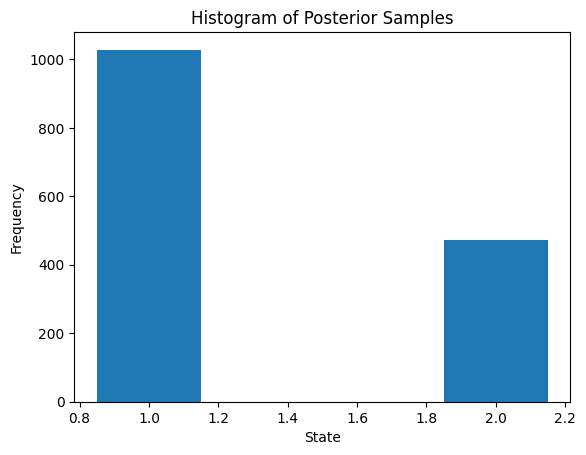

In [4]:
# Plot histogram of posterior samples
plt.figure()
plt.hist(theta_post, bins=[0.5,1.5,2.5], rwidth=0.3)
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('Histogram of Posterior Samples')
state_labels = {1: "helix", 2: "other"}
plt.show()

In [ ]:
theta_post

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
sum(theta_post)
# len(theta_post)
# np.unique(theta_post)
unique, counts = np.unique(theta_post, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   1 1069]
 [   2  431]]


In [ ]:
# Lectura de la base de datos
filename = '2018-06-06-ss.cleaned.csv'
data1 = pd.read_csv(filename, sep = ',')

# Revisión de los datos
print(data1.shape)
data1.head(10)

(393732, 7)


,pdb_id,chain_code,seq,sst8,sst3,len,has_nonstd_aa
0,1A30,C,EDL,CBC,CEC,3,False
1,1B05,B,KCK,CBC,CEC,3,False
2,1B0H,B,KAK,CBC,CEC,3,False
3,1B1H,B,KFK,CBC,CEC,3,False
4,1B2H,B,KAK,CBC,CEC,3,False
5,1B32,B,KMK,CBC,CEC,3,False
6,1B3F,B,KHK,CBC,CEC,3,False
7,1B3G,B,KIK,CBC,CEC,3,False
8,1B3H,B,KAK,CBC,CEC,3,False
9,1B3L,B,KGK,CBC,CEC,3,False


In [ ]:
# Lectura de la base de datos
filename = '2018-06-06-pdb-intersect-pisces.csv'
data = pd.read_csv(filename, sep = ',')

# Revisión de los datos
print(data.shape)
data.head(10)

(9078, 11)


,pdb_id,chain_code,seq,sst8,sst3,len,has_nonstd_aa,Exptl.,resolution,R-factor,FreeRvalue
0,1FV1,F,NPVVHFFKNIVTPRTPPPSQ,CCCCCBCCCCCCCCCCCCCC,CCCCCECCCCCCCCCCCCCC,20,False,XRAY,1.90,0.23,0.27
1,1LM8,H,DLDLEMLAPYIPMDDDFQLR,CCCCCCCCCBCCSCCCEECC,CCCCCCCCCECCCCCCEECC,20,False,XRAY,1.85,0.20,0.24
2,1O06,A,EEDPDLKAAIQESLREAEEA,CCCHHHHHHHHHHHHHHHTC,CCCHHHHHHHHHHHHHHHCC,20,False,XRAY,1.45,0.19,0.22
3,1QOW,D,CTFTLPGGGGVCTLTSECI*,CCTTSCTTCSSTTSSTTCCC,CCCCCCCCCCCCCCCCCCCC,20,True,XRAY,1.06,0.14,1.00
4,1RDQ,I,TTYADFIASGRTGRRNAIHD,CHHHHHHTSSCSSCCCCEEC,CHHHHHHCCCCCCCCCCEEC,20,False,XRAY,1.26,0.13,0.16
5,1T6O,B,QDSRRSADALLRLQAMAGIS,CHHHHHHHHHHHHHHHHTCC,CHHHHHHHHHHHHHHHHCCC,20,False,XRAY,2.00,0.23,0.28
6,1T7F,B,SSRGLLWDLLTKDSRSGSGK,CCCCHHHHHHCCCCCCCCCC,CCCCHHHHHHCCCCCCCCCC,20,False,XRAY,1.60,0.20,0.22
7,1U7B,B,SRQGSTQGRLDDFFKVTGSL,CCCCCCBCCGGGTSBCCCCC,CCCCCCECCHHHCCECCCCC,20,False,XRAY,1.88,0.22,0.27
8,1UGX,B,DEQSGISQTVIVGPWGAKVS,CCCCCSCCCEEEEEEECCCC,CCCCCCCCCEEEEEEECCCC,20,False,XRAY,1.60,0.19,0.20
9,1VPP,Y,RGWVEICAADDYGRCLTEAQ,CCCEEEEEBCTTSCBTTCCC,CCCEEEEEECCCCCECCCCC,20,False,XRAY,1.90,0.19,0.27


In [ ]:
data.loc[data['pdb_id'] == '1B3L']

,pdb_id,chain_code,seq,sst8,sst3,len,has_nonstd_aa,Exptl.,resolution,R-factor,FreeRvalue


In [ ]:
a = data1['len'].unique()
a

array(['CEC', 'CCEC', 'CECC', ...,
       'CCCCCCCCCCCCCCECCCEEEEEEEEEECCEEEEEEEECCCCCCCECEEEECCCCCCCCCCCCCCCEEEEEEECCHHHHHHHHHHHHCCCCCCCCCCCCECECCCEEEEEECCCCCEEEECCCCCCCCCCCCEEEEEECCCCCCCCEEEEEECCCCCCCCCECCCCCEEEEEECCCCCEEEEEEECCEEEEEEECCCCCEEEEECCCCCCCCECECCCEEEEEECCCCEEEEECCCCCCCCCCEEEEEEHHHHCCHHHCEEEEECCCCCCCCECCCCCCEEEEECCCCCEEEEECCCEEEEECHHHCCHHHHCEEEECCCCCCCCCCCCCCCCCCCCCCECCCCCEEEEECCCCCEEEECCCCCCCCCCCCCCEEEEEECCCCHHHCEEEEECCHHHHHHHHHHHHHHHHHHHHHHHHHHCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHHHCCCCCCCCCCCCCCHHHHHHHHHHHHHHCCHHHHHHHHHHHHHCCCCCCCCCCCCCHHHHHCHHHHHHHHHHHHHHHHCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCHHHHHHHHHCCHHHHHHCCHHHHHHHHHHHHCCHHHHHHHCCHHHHHHHHHHHHHHHCCEEECCCCCCCCCEEEEEEEEECCCCCCCCCCCEEEEEECCCCCCCCCCCCCCCCCCCCCCCCCEEEECCCCCEEEECCCCEEEECCCCCCCCCEEEEEEECCCCEEEEEECCEEEEEEEECCCCCCCCCEEEEECCCCEEEEECCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHHHHHHHHHHHHHCCECCCCCECCCCECCCCCCHHHCCHHHHHHHHHHHHHHHHHHHHCCCCCEECCCCCCCCCCCCCCCC

In [ ]:
import pandas as pd
from tabulate import tabulate

# Define amino acid percentages
amino_acids = ['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
               'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']

alpha_helix_percentages = [12, 6, 3, 5, 1, 9, 5, 4, 2, 7,
                           12, 6, 3, 4, 2, 5, 4, 1, 3, 6]

other_percentages = [6, 5, 5, 6, 2, 5, 3, 9, 3, 5,
                     8, 6, 2, 4, 6, 7, 6, 1, 4, 7]

# Create DataFrame
df = pd.DataFrame({
    'Amino Acid': amino_acids,
    'alpha-helix (%)': alpha_helix_percentages,
    'other (%)': other_percentages
})

df.set_index('Amino Acid', inplace=True)

# Print with tabulate
print(tabulate(df, headers='keys', tablefmt='grid'))

+--------------+-------------------+-------------+
| Amino Acid   |   alpha-helix (%) |   other (%) |
+==============+===================+=============+
| A            |                12 |           6 |
+--------------+-------------------+-------------+
| R            |                 6 |           5 |
+--------------+-------------------+-------------+
| N            |                 3 |           5 |
+--------------+-------------------+-------------+
| D            |                 5 |           6 |
+--------------+-------------------+-------------+
| C            |                 1 |           2 |
+--------------+-------------------+-------------+
| E            |                 9 |           5 |
+--------------+-------------------+-------------+
| Q            |                 5 |           3 |
+--------------+-------------------+-------------+
| G            |                 4 |           9 |
+--------------+-------------------+-------------+
| H            |               